# Лабораторная работа №5

Вариант 4 Балашов Денис Васильевич

## Цель работы
- изучение принципов построения информационных систем с использованием логических методов классификации.

## Задачи
- освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
- освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
- изучение параметров логической классификации;
- освоение модификаций логических методов классификации.

## Теоритечисеские сведения
Каждый выполненный скиллшот характеризуется 18 характеристиками, состоящими из вводимых игроками данных и внутриигровых показателей, собранных в разное время, образующих многомерный временной ряд
В датасете rocket_league.data находятся следующие колонки (переменные):

- Shot Number - порядковый номер броска
- Game Seconds - время броска в секундах от начала игры
- Player Velocity - скорость игрока в момент броска
- Ball Velocity - скорость мяча в момент броска
- Ball Spin Rate - угловая скорость вращения мяча
- Ball Hit Angle - угол, под которым мяч был поражен игроком
- Ball Angle - угол полета мяча относительно ворот
- Goal Width - ширина ворот в момент броска
- Goal Length - высота ворот в момент броска
- Goal Distance - расстояние от мяча до ворот в момент броска
- Goal Height - высота центра ворот относительно мяча
- Player Hit Height - высота попадания игрока по мячу
- Opponent Distance - расстояние до ближайшего оппонента
- Shot Success - целевой столбец, успешность броска (1 - гол, 0 - мимо)

Всего 15 переменных, которые характеризуют параметры броска и игровой ситуации. Целевой столбец Shot Success показывает, был ли забит гол.


In [104]:
import pandas as pd

# Замени путь на актуальный
file_path = 'rocket_league_skillshots.data'

# Чтение и предварительная обработка файла: удаление строк с одним символом
with open(file_path, 'r') as file:
    lines = [line for line in file if len(line.strip()) > 1]

# Создание временного файла без ненужных строк
temp_file_path = 'temp_file.data'
with open(temp_file_path, 'w') as temp_file:
    temp_file.writelines(lines)

# Загрузка данных из временного файла
column_names = ['BallAcceleration', 'Time', 'DistanceWall', 'DistanceCeil', 'DistanceBall', 'PlayerSpeed', 'BallSpeed', 'up', 'accelerate', 'slow', 'goal', 'left', 'boost', 'camera', 'down', 'right', 'slide', 'jump', 'NaN']
df = pd.read_csv(temp_file_path, names=column_names, delimiter=" ")  # Укажите правильный разделитель, если не пробел

# Посмотрим на первые несколько строк данных
df.head(20)

,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,accelerate,slow,goal,left,boost,camera,down,right,slide,jump,NaN
0,1636.798772,0.000000,3498.01,2012.98,299.668270,104267.426232,99035.849337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
1,3198.029397,0.138893,3494.08,2012.98,229.896780,124248.031988,102233.878734,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,NaN
2,0.000000,0.173617,3494.08,2012.98,237.350599,124248.031988,102968.358990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
3,9914.766242,0.312510,3500.08,2012.98,151.880921,115248.016009,112883.125231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
4,5907.747166,0.625019,3521.65,2013.00,154.556104,125091.256173,118790.872398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
5,0.000000,0.833354,3533.40,2013.10,149.496614,134706.206676,128733.311070,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
6,-581.095135,0.972264,3548.04,2013.00,148.715162,125937.158238,128152.215935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
7,647.244755,1.041724,3548.04,2013.00,192.940752,125937.158238,128799.460690,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN
8,0.000000,1.215342,3576.77,2013.03,221.113553,126848.413924,132047.850725,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN
9,12766.909897,1.458422,3693.18,2013.15,155.587193,151895.307874,144814.760622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN


In [105]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Удалить строки с пропущенными значениями в столбце 'DistanceCeil'
df = df.dropna(subset=['DistanceCeil'])

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(['DistanceBall', 'DistanceCeil'], axis=1)
y = df['DistanceCeil']

# Разбиваем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Создаем и обучаем модель регрессии
tree = DecisionTreeRegressor(max_depth=3, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# Делаем предсказания
y_pred = tree.predict(X_test)

# Оцениваем модель, например, с помощью среднеквадратичной ошибки (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка модели: {mse:.2f}")

Среднеквадратичная ошибка модели: 313816.87


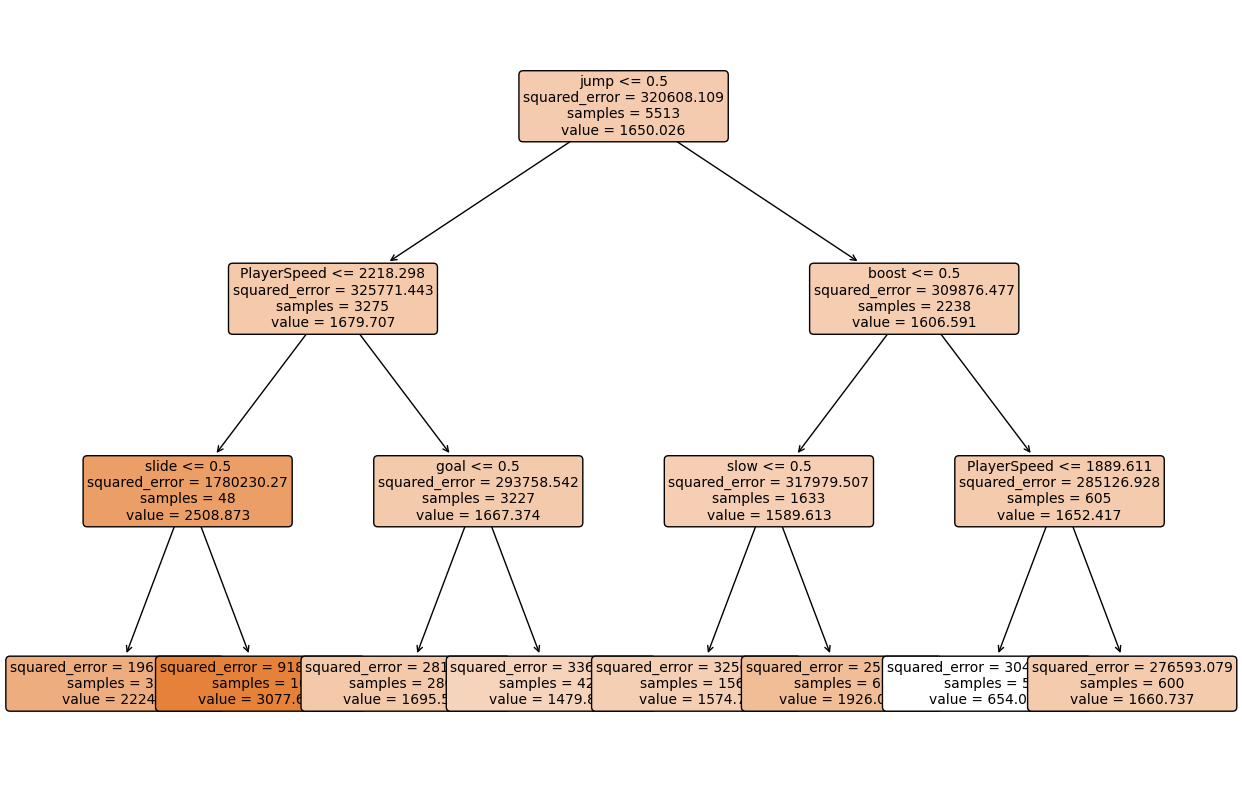

In [106]:
# Визуализация дерева решений

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)
plt.show()

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Задай значения max_depth, которые ты хочешь проверить
max_depth_values = [3, 5, 7, 10, None]

# Список для сохранения оценок кросс-валидации
cv_scores_depth = []

# Проходим по значениям max_depth
for depth in max_depth_values:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=21, max_features=2)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')  # используем MSE в качестве метрики
    cv_scores_depth.append(-scores.mean())  # берем отрицательное значение MSE

# Теперь у нас есть список с оценками для каждого значения max_depth


In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Задай значения max_features, которые ты хочешь проверить
max_features_values = [2, 4, 6, 8, 'sqrt', 'log2', None]

# Список для сохранения оценок кросс-валидации
cv_scores_features = []

# Проходим по значениям max_features
for features in max_features_values:
    tree = DecisionTreeRegressor(max_depth=5, random_state=21, max_features=features)
    scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_squared_error')  # используем MSE в качестве метрики
    cv_scores_features.append(-scores.mean())  # берем отрицательное значение MSE

# Теперь у нас есть список с оценками для каждого значения max_features


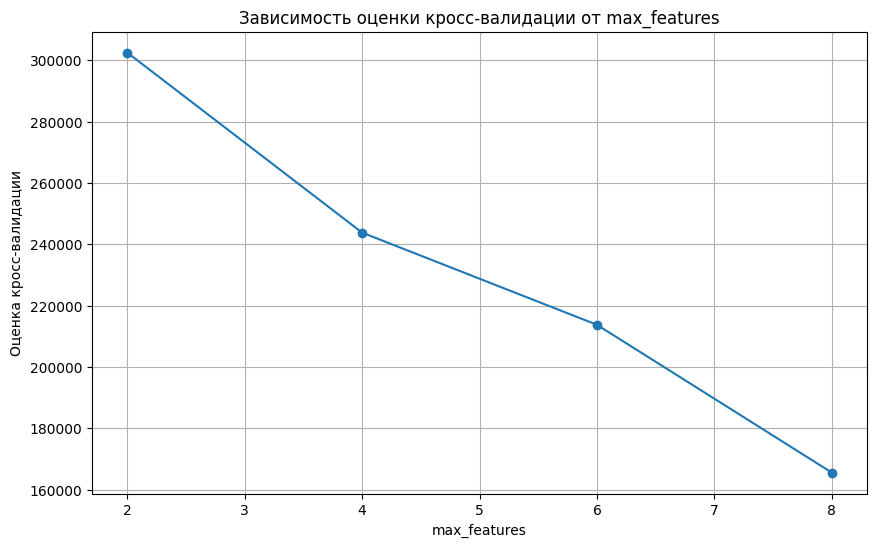

In [109]:
import matplotlib.pyplot as plt

# Убираем строковые значения из max_features_values
max_features_values = [val for val in max_features_values if isinstance(val, (int, float))]

# Убираем соответствующие значения из cv_scores_features
cv_scores_features = cv_scores_features[:len(max_features_values)]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, cv_scores_features, marker='o')
plt.title('Зависимость оценки кросс-валидации от max_features')
plt.xlabel('max_features')
plt.ylabel('Оценка кросс-валидации')
plt.grid(True)
plt.show()

In [110]:
# Находим индекс максимального значения оценки кросс-валидации для max_depth
optimal_depth_index = np.argmax(cv_scores_depth)
optimal_depth = max_depth_values[optimal_depth_index]
print(f'Оптимальная глубина дерева (max_depth): {optimal_depth}')

# Находим индекс максимального значения оценки кросс-валидации для max_features
optimal_features_index = np.argmax(cv_scores_features)
optimal_features = max_features_values[optimal_features_index]
print(f'Оптимальное количество признаков (max_features): {optimal_features}')

Оптимальная глубина дерева (max_depth): 3
Оптимальное количество признаков (max_features): 2


In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Создаем и обучаем модель регрессии
final_tree = DecisionTreeRegressor(max_depth=optimal_depth, random_state=21, max_features=optimal_features)
final_tree.fit(X, y)

# Делаем предсказания на тестовом наборе данных
y_final_pred = final_tree.predict(X_test)

# Оцениваем модель, например, с использованием среднеквадратичной ошибки (MSE)
final_mse = mean_squared_error(y_test, y_final_pred)
print(f"Среднеквадратичная ошибка окончательной модели: {final_mse:.2f}")

Среднеквадратичная ошибка окончательной модели: 308163.27


In [112]:
!pip install mlxtend

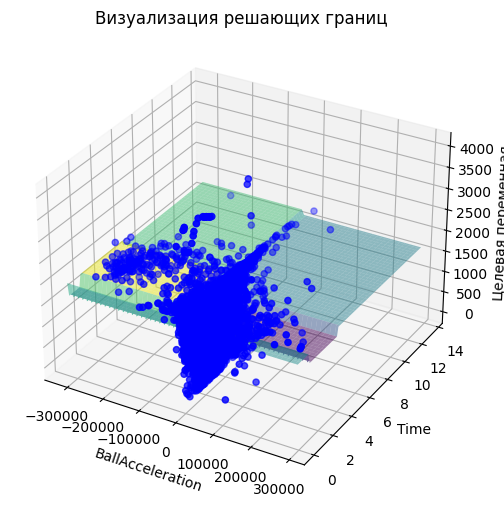

In [113]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Создаем матрицу признаков для обучения (возьмем первые два признака для простоты)
X_train_subset = X_train.iloc[:, :2].values

# Создаем и обучаем модель
tree = DecisionTreeRegressor(max_depth=3, random_state=21)
tree.fit(X_train_subset, y_train)

# Создаем сетку точек для визуализации
x1 = np.linspace(X_train_subset[:, 0].min(), X_train_subset[:, 0].max(), 100)
x2 = np.linspace(X_train_subset[:, 1].min(), X_train_subset[:, 1].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
X_grid = np.c_[x1.ravel(), x2.ravel()]
y_grid = tree.predict(X_grid)
y_grid = y_grid.reshape(x1.shape)

# Визуализируем решающие границы
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_subset[:, 0], X_train_subset[:, 1], y_train, c='b', marker='o', label='Обучающие данные')
ax.plot_surface(x1, x2, y_grid, alpha=0.5, cmap='viridis')
ax.set_xlabel(X_train.columns[0])
ax.set_ylabel(X_train.columns[1])
ax.set_zlabel('Целевая переменная')
plt.title('Визуализация решающих границ')
plt.show()

In [65]:
# Посмотрим на признаки, которые использовались при обучении модели
feature_names = X.columns
feature_names

Index(['BallAcceleration', 'Time', 'DistanceWall', 'DistanceCeil',
       'DistanceBall', 'up', 'accelerate', 'slow', 'goal', 'left', 'boost',
       'camera', 'down', 'right', 'slide', 'jump', 'NaN'],
      dtype='object')

## Контрольные вопросы

### Поясните принцип построения дерева решений.
- Дерево решений строится с использованием принципа жадной максимизации прироста информации. В начале процесса все данные находятся в корне дерева, а затем при каждом разделении выбирается признак и порог, которые максимизируют прирост информации. Данный процесс повторяется рекурсивно для каждого поддерева, пока не выполнится критерий остановки (например, достигнута максимальная глубина дерева или число объектов в узле меньше определенного порога).

### Укажите статистическое определение информативности.
- Статистическое определение информативности основывается на измерении "чистоты" узла, которая может быть определена разными способами в зависимости от задачи. Например, для задач классификации это может быть доля объектов основного класса в узле.

### Поясните энтропийное определение информативности.
- Энтропийное определение информативности использует меру энтропии, которая измеряет степень хаоса или неопределенности в системе. Чем выше энтропия, тем менее информативен узел.

### Что такое многоклассовая информативность? Для чего она применяется?
- Многоклассовая информативность применяется в задачах, где число классов больше двух. Она может быть определена, например, с использованием критерия Джини или энтропии. Применение многоклассовой информативности позволяет строить деревья решений для задач с более чем двумя классами.

### Поясните назначение и алгоритм бинаризации количественных признаков.
- Бинаризация количественных признаков нужна для того, чтобы преобразовать их в категориальные. Алгоритм заключается в выборе порога, который наилучшим образом разделяет данные на две категории.

### Поясните порядок поиска закономерностей в форме конъюнкций.
- Порядок поиска закономерностей в форме конъюнкций заключается в том, чтобы последовательно добавлять предикаты (условия) к правилам, проверяя, как они улучшают качество модели.